In [1]:
import pandas as pd
occupancy = pd.read_csv('./data/occupancy.csv')
occupancy.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2/2/2015 14:00,23.7000,26.272,585.200000,749.200000,0.004764,1
1,2/2/2015 15:00,23.7180,26.290,578.400000,760.400000,0.004773,1
2,2/2/2015 16:00,23.7300,26.230,572.666667,769.666667,0.004765,1
3,2/2/2015 17:00,23.7225,26.125,493.750000,774.750000,0.004744,1
4,2/2/2015 18:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [2]:
occupancy.date = pd.to_datetime(occupancy.date)
occupancy.index = pd.DatetimeIndex(occupancy.date, freq='H')
occupancy.index

DatetimeIndex(['2015-02-02 14:00:00', '2015-02-02 15:00:00',
               '2015-02-02 16:00:00', '2015-02-02 17:00:00',
               '2015-02-02 18:00:00', '2015-02-02 19:00:00',
               '2015-02-02 20:00:00', '2015-02-02 21:00:00',
               '2015-02-02 22:00:00', '2015-02-02 23:00:00',
               ...
               '2015-05-24 04:00:00', '2015-05-24 05:00:00',
               '2015-05-24 06:00:00', '2015-05-24 07:00:00',
               '2015-05-24 08:00:00', '2015-05-24 09:00:00',
               '2015-05-24 10:00:00', '2015-05-24 11:00:00',
               '2015-05-24 12:00:00', '2015-05-24 13:00:00'],
              dtype='datetime64[ns]', name='date', length=2664, freq='H')

In [4]:
occupancy.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,,
2015-02-02 14:00:00,2015-02-02 14:00:00,23.7000,26.272,585.200000,749.200000,0.004764,1
2015-02-02 15:00:00,2015-02-02 15:00:00,23.7180,26.290,578.400000,760.400000,0.004773,1
2015-02-02 16:00:00,2015-02-02 16:00:00,23.7300,26.230,572.666667,769.666667,0.004765,1
2015-02-02 17:00:00,2015-02-02 17:00:00,23.7225,26.125,493.750000,774.750000,0.004744,1
2015-02-02 18:00:00,2015-02-02 18:00:00,23.7540,26.200,488.600000,779.000000,0.004767,1


Figure(432x288)


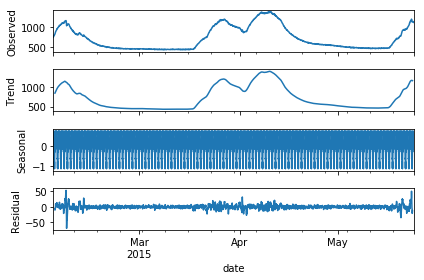

In [43]:
res = sm.tsa.seasonal_decompose(occupancy.CO2)
print(res.plot())

Figure(432x288)


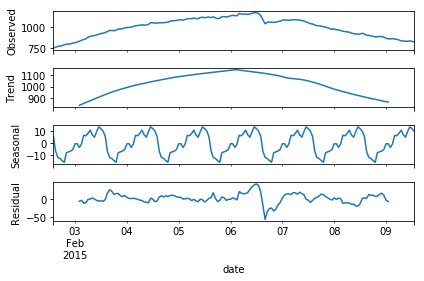

In [46]:
%matplotlib inline
import statsmodels.api as sm

res = sm.tsa.seasonal_decompose(occupancy.CO2[0:(24*7)])
#print(res.seasonal)
print(res.plot())

In [12]:
T = 3600
F = 1/3600
print(f'T={T}seg f={F}Hz')

T=3600seg f=0.0002777777777777778Hz


84
2.314814814814815e-05 11.999999999999998 8.444592146146099e-14


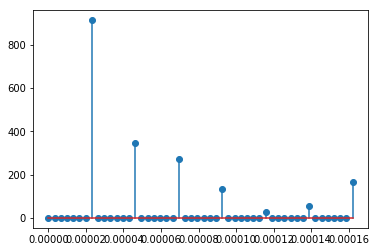

In [50]:
from scipy.fftpack import fft
import numpy as np
import matplotlib.pyplot as plt

mod_FFT = np.abs(fft(res.seasonal))
print(len(mod_FFT)//2)
mod_FFT = mod_FFT[0:len(mod_FFT)//2]

x = np.arange(0,F,F/len(mod_FFT))

plt.stem(x[:50],mod_FFT[:50])
print(x[7],1/x[7]/3600,mod_FFT[2])

In [87]:
import math
Fm = 100
total_seconds = 1
x = np.arange(0,total_seconds,total_seconds/Fm)

f_osc = 1 
y = np.sin((2*math.pi*f_osc)*x) + 0.1 * np.sin((2*math.pi*f_osc*10)*x)

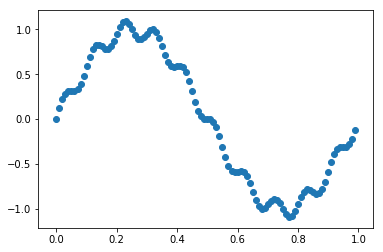

In [88]:
plt.scatter(x,y)

<StemContainer object of 3 artists>

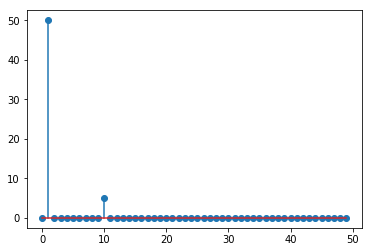

In [89]:
fft_mod = np.abs(fft(y))
fft_mod = fft_mod[0:len(fft_mod)//2]

fx = np.arange(0,Fm/2,Fm/2/len(fft_mod))
plt.stem(fx,fft_mod)